## Exploratory Data Analysis

In [2]:
import sys
sys.path.append('../')

import mmgclip
import os 
import matplotlib.pyplot as plt
import numpy as np


from hydra import compose, initialize
from omegaconf import DictConfig, OmegaConf
from attrdict import AttrDict

# for auto reload when changes are made in the package
%load_ext autoreload
%autoreload 2

/local/abdel/mmg-clip/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /home/abdel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### 1. Analysing the annotated json dataset

Loading the dataset

In [3]:
with initialize(config_path="../configs"):
    cfg = compose(config_name="train_multi_class_clf") # train_sentence_clf, train_multi_class_clf

print(OmegaConf.to_yaml(cfg.base))

# convert the config dict to a class object
try:
    cfg['dataset']['config']['lists_dataset_path'] = "../data/02_data_lists/data/lists"
    cfg['dataset']['config']['annotated_dataset_path'] = "../data/02_data_T_regions"
    cfg['base']['features_export_dir'] = "../outputs/dataset"
    cfg['base']['export_dir'] = '../outputs/2024-03-11/10-57-24'
    cfg['base']['results_export_dir'] = '../outputs/2024-03-11/10-57-24/results'
    cfg['base']['tensorboard_export_dir'] = '../outputs/...'
    
    mmgconfig = AttrDict(cfg)
    print(mmgconfig)
except Exception as e:
    print("An error occurred:", e)

patience: 5
seed: 42
features_export_dir: outputs/dataset
export_dir: ${hydra:run.dir}
results_export_dir: ${hydra:run.dir}/results
tensorboard_export_dir: runs/${now:%Y-%m-%d}/${now:%H-%M-%S}

AttrDict({'checkpoints': {'checkpoints_export_dir': '${hydra:run.dir}/checkpoints', 'checkpoints_file_name': 'model.pth'}, 'base': {'patience': 5, 'seed': 42, 'features_export_dir': '../outputs/dataset', 'export_dir': '../outputs/2024-03-11/10-57-24', 'results_export_dir': '../outputs/2024-03-11/10-57-24/results', 'tensorboard_export_dir': '../outputs/...'}, 'optimizer': {'name': 'adamw', 'config': {'learning_rate': 5e-05, 'weight_decay': 0.0001}}, 'scheduler': {'name': 'cosine', 'config': {'warmup_epochs': 0.1, 'epochs': 30}}, 'experiments': {'config': {'experiment_name': 'classification', 'metrics': ['${dataset.config.enums_class}']}}, 'dataset': {'name': 'ImageLabelDataset', 'config': {'enums_class': 'MassShapeLabels', 'search_col': 'mass_shape', 'generate_label_prompt_sentence': False, 'gene

In [4]:
dataset = mmgclip.create_dataset_df(mmgconfig)
dataset

,image_id,image_label,mass_margin,mass_shape,has_mass,has_architectural_distortion,has_calc,image_path
0,p0200000202cl,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,False,False,/storage/Features/features/png_archive/2D_100m...
1,p0200000202cr,0,"[-1, -1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1, -1]",True,False,True,/storage/Features/features/png_archive/2D_100m...
2,p0200000202ml,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,False,False,/storage/Features/features/png_archive/2D_100m...
3,p0200000202mr,0,"[-1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1]",True,False,False,/storage/Features/features/png_archive/2D_100m...
4,p0200000301cl,0,[-1],[-1],False,False,False,/storage/Features/features/png_archive/2D_100m...
...,...,...,...,...,...,...,...,...
6437,p0202057000mr,1,[-1],[-1],False,False,False,/storage/Features/features/png_archive/2D_100m...
6438,p0202061100cl,1,[Spiculated],[Irregular],True,False,False,/storage/Features/features/png_archive/2D_100m...
6439,p0202061100cr,1,[-1],[-1],False,False,False,/storage/Features/features/png_archive/2D_100m...
6440,p0202061100ml,1,[Spiculated],[Irregular],True,False,False,/storage/Features/features/png_archive/2D_100m...


In [20]:
ll = dataset[(dataset['has_calc'] == True) & (dataset['has_mass'] == False) & (dataset['image_label'] != 2)] #.sample()
ll

,image_id,image_label,mass_margin,mass_shape,has_mass,has_architectural_distortion,has_calc,image_path
36,p0200002001cl,0,[-1],[-1],False,False,True,/storage/Features/features/png_archive/2D_100m...
37,p0200002001cr,0,[-1],[-1],False,False,True,/storage/Features/features/png_archive/2D_100m...
38,p0200002001ml,0,[-1],[-1],False,False,True,/storage/Features/features/png_archive/2D_100m...
39,p0200002001mr,0,[-1],[-1],False,False,True,/storage/Features/features/png_archive/2D_100m...
49,p0200002301cr,0,[-1],[-1],False,False,True,/storage/Features/features/png_archive/2D_100m...
...,...,...,...,...,...,...,...,...
3127,p0200901001mr,0,"[-1, -1, -1]","[-1, -1, -1]",False,False,True,/storage/Features/features/png_archive/2D_100m...
3206,p0201110002cr,0,"[-1, -1]","[-1, -1]",False,False,True,/storage/Features/features/png_archive/2D_100m...
3225,p0201133800ml,0,[-1],[-1],False,False,True,/storage/Features/features/png_archive/2D_100m...
3261,p0201177900cr,0,"[-1, -1]","[-1, -1]",False,False,True,/storage/Features/features/png_archive/2D_100m...


In [27]:
dataset[dataset['image_id'] == "p0200513301ml"]

,image_id,image_label,mass_margin,mass_shape,has_mass,has_architectural_distortion,has_calc,image_path
1773,p0200513301ml,0,"[-1, -1]","[-1, -1]",False,False,True,/storage/Features/features/png_archive/2D_100m...


In [6]:
dataset[dataset['image_id'] == 'p0200586901mr']

,image_id,image_label,mass_margin,mass_shape,has_mass,image_path
2331,p0200586901mr,0,"[-1, -1, -1, -1]","[-1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...


There are a total of 6485 json files, total of 3311 of benign and 3174 of stl classes, which makes it almost balanced in terms of the type.

In [7]:
dataset['image_label'].value_counts()

image_label
0    3311
1    1653
2    1478
Name: count, dtype: int64

As we observed that there could be more than one region in the annotation for a single view, the `mmgclip.create_dataset_df` function was developed to allocate a value of -1 for a region that doesn't have information "dictionary key and value" for the mass margin and mass shape. All regions are stored in a list for each image view to have the categorization made at the image view level.

The next cells will analyse if there are more than one region in the image that had the required information, this way we can further analyse per `mass_margin` or `mass_shape`.

In [8]:
dataset['mass_margin'].head(20)

0                 [Ill defined, -1, -1, -1, -1, -1, -1]
1                          [-1, -1, -1, -1, -1, -1, -1]
2                 [Ill defined, -1, -1, -1, -1, -1, -1]
3                              [-1, -1, -1, -1, -1, -1]
4                                                  [-1]
5                                                  [-1]
6                                                  [-1]
7                                                  [-1]
8                                                  [-1]
9                                       [Circumscribed]
10                                                 [-1]
11                                      [Circumscribed]
12                     [-1, -1, -1, -1, -1, -1, -1, -1]
13    [Circumscribed, Circumscribed, -1, -1, -1, -1,...
14                             [-1, -1, -1, -1, -1, -1]
15    [Circumscribed, Circumscribed, -1, -1, -1, -1,...
16                                                 [-1]
17                                              

In [10]:
# Define a function to check if all values in a list are equal to -1, we return true for rows that has a single value != -1
def all_values_are_negative(lst):
    return not all(val == -1 for val in lst)

# Filter out the rows where all values in the list are equal to -1
dataset['has_mass_margin'] = dataset['mass_margin'].apply(all_values_are_negative)
dataset['has_mass_shape'] = dataset['mass_shape'].apply(all_values_are_negative)

dataset[dataset['has_mass_margin'] == True]

,image_id,image_label,mass_margin,mass_shape,has_mass,image_path,has_mass_margin,has_mass_shape
0,p0200000202cl,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True
2,p0200000202ml,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True
9,p0200000401cr,0,[Circumscribed],[Oval],True,/storage/Features/features/png_archive/2D_100m...,True,True
11,p0200000401mr,0,[Circumscribed],[Oval],True,/storage/Features/features/png_archive/2D_100m...,True,True
13,p0200000402cr,0,"[Circumscribed, Circumscribed, -1, -1, -1, -1,...","[Oval, Round, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True
...,...,...,...,...,...,...,...,...
6425,p0202038100mr,1,"[Ill defined, -1, -1]","[Irregular, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True
6434,p0202057000cl,1,[Ill defined],[Irregular],True,/storage/Features/features/png_archive/2D_100m...,True,True
6436,p0202057000ml,1,[Ill defined],[Irregular],True,/storage/Features/features/png_archive/2D_100m...,True,True
6438,p0202061100cl,1,[Spiculated],[Irregular],True,/storage/Features/features/png_archive/2D_100m...,True,True


We created two new columns `has_mass_margin` and `has_mass_shape` in the dataframe to see which rows has atleast a single value != -1 in both `mass_margin` and `mass_shape` columns.

As we can see from the code below, there are a significant large number of images that doesn't have both values, only 2537 image views has atleast one `mass_margin` and 2538 hass atleast `mass_shape` values.

In [11]:
# Get value counts for has_mass_margin
mass_margin_counts = dataset['has_mass_margin'].value_counts()

# Get value counts for has_mass_shape
mass_shape_counts = dataset['has_mass_shape'].value_counts()

print(mass_margin_counts, '\n')
print(mass_shape_counts)

has_mass_margin
False    3919
True     2523
Name: count, dtype: int64 

has_mass_shape
False    3918
True     2524
Name: count, dtype: int64


In [20]:
dataset

,image_id,image_label,mass_margin,mass_shape,has_mass,image_path,has_mass_margin,has_mass_shape
0,p0200000202cl,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True
1,p0200000202cr,0,"[-1, -1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,False,False
2,p0200000202ml,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True
3,p0200000202mr,0,"[-1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,False,False
4,p0200000301cl,0,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False
...,...,...,...,...,...,...,...,...
6437,p0202057000mr,1,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False
6438,p0202061100cl,1,[Spiculated],[Irregular],True,/storage/Features/features/png_archive/2D_100m...,True,True
6439,p0202061100cr,1,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False
6440,p0202061100ml,1,[Spiculated],[Irregular],True,/storage/Features/features/png_archive/2D_100m...,True,True


In [18]:
dataset[dataset['has_mass'] == True].shape

(6115, 8)

Labels that has_mass are more than the sum of the value counts of has_mass_margin

Are those images the same? And why there is an extra row that has `True` mass shape more than the count of `True` mass margins?

In [12]:
dataset[(dataset['has_mass_shape'] == True) & (dataset['has_mass_margin'] == False)]

,image_id,image_label,mass_margin,mass_shape,has_mass,image_path,has_mass_margin,has_mass_shape
171,p0200022101cl,0,[-1],[Irregular],True,/storage/Features/features/png_archive/2D_100m...,False,True
173,p0200022101ml,0,[-1],[Irregular],True,/storage/Features/features/png_archive/2D_100m...,False,True
358,p0200056201ml,0,"[-1, -1, -1, -1, -1]","[Irregular, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,False,True


In [13]:
dataset[(dataset['has_mass_shape'] == False) & (dataset['has_mass_margin'] == True)]

,image_id,image_label,mass_margin,mass_shape,has_mass,image_path,has_mass_margin,has_mass_shape
3323,p0200003401cl,1,[Spiculated],[-1],True,/storage/Features/features/png_archive/2D_100m...,True,False
3325,p0200003401ml,1,[Spiculated],[-1],True,/storage/Features/features/png_archive/2D_100m...,True,False


From the two cells above, it seems that there is an issue with certain json files, where there is an indication for `mass_margin`, without a `mass_shape`, or vice versa, totall of 5 files showing the results.

We have to keep this into account when we want to form a sentence, that those files might not be suitable for sentence classification.

Now lets see if we have more than one value that is != -1 in those rows of `has_mass_margin` == True or `has_mass_shape` == True.

In [21]:
dataset['has_multiple_margins'] = dataset['mass_margin'].apply(lambda x: sum(1 for val in x if val != -1) > 1)
dataset['has_multiple_shapes']  = dataset['mass_shape'].apply(lambda x: sum(1 for val in x if val != -1) > 1)


dataset[(dataset['has_mass_shape'] == True) | (dataset['has_mass_margin'] == True)].head(20)

,image_id,image_label,mass_margin,mass_shape,has_mass,image_path,has_mass_margin,has_mass_shape,has_multiple_margins,has_multiple_shapes
0,p0200000202cl,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False
2,p0200000202ml,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False
9,p0200000401cr,0,[Circumscribed],[Oval],True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False
11,p0200000401mr,0,[Circumscribed],[Oval],True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False
13,p0200000402cr,0,"[Circumscribed, Circumscribed, -1, -1, -1, -1,...","[Oval, Round, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,True,True
15,p0200000402mr,0,"[Circumscribed, Circumscribed, -1, -1, -1, -1,...","[Oval, Round, -1, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,True,True
30,p0200001902ml,0,"[Obscured, -1]","[Round, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False
34,p0200001903ml,0,"[Obscured, -1, -1]","[Round, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False
40,p0200002201cl,0,"[Ill defined, Circumscribed]","[Oval, Oval]",True,/storage/Features/features/png_archive/2D_100m...,True,True,True,True
42,p0200002201ml,0,"[Obscured, Circumscribed]","[Oval, Oval]",True,/storage/Features/features/png_archive/2D_100m...,True,True,True,True


From the cell above, we can see that there are some enteries that has more than one value in their respective `masss_margin` or `mass_shape` lists.

In [22]:
dataset['has_multiple_margins'].value_counts()

has_multiple_margins
False    6250
True      192
Name: count, dtype: int64

In [23]:
dataset['has_multiple_shapes'].value_counts()

has_multiple_shapes
False    6250
True      192
Name: count, dtype: int64

As observed from the 2 cells above, there are identical image views counts with multiple regions. Are those region values identical?

In [24]:
dataset[dataset['has_multiple_margins'] == True]['mass_margin']

13      [Circumscribed, Circumscribed, -1, -1, -1, -1,...
15      [Circumscribed, Circumscribed, -1, -1, -1, -1,...
40                           [Ill defined, Circumscribed]
42                              [Obscured, Circumscribed]
81      [Obscured, Circumscribed, -1, -1, -1, -1, -1, ...
                              ...                        
6340         [Spiculated, Spiculated, -1, -1, -1, -1, -1]
6342                     [Spiculated, Spiculated, -1, -1]
6378    [Ill defined, Spiculated, -1, -1, -1, Spiculat...
6392               [Spiculated, Obscured, -1, -1, -1, -1]
6394          [Ill defined, Obscured, -1, -1, -1, -1, -1]
Name: mass_margin, Length: 192, dtype: object

In [25]:
dataset[dataset['has_multiple_shapes'] == True]['mass_shape']

13                      [Oval, Round, -1, -1, -1, -1, -1]
15              [Oval, Round, -1, -1, -1, -1, -1, -1, -1]
40                                           [Oval, Oval]
42                                           [Oval, Oval]
81         [Round, Round, -1, -1, -1, -1, -1, -1, -1, -1]
                              ...                        
6340           [Irregular, Irregular, -1, -1, -1, -1, -1]
6342                       [Irregular, Irregular, -1, -1]
6378    [Irregular, Irregular, -1, -1, -1, Irregular, ...
6392                       [Round, Round, -1, -1, -1, -1]
6394                   [Round, Round, -1, -1, -1, -1, -1]
Name: mass_shape, Length: 192, dtype: object

Looking at the results of some samples above, we can see that there are different regions (thus different labels for a classification task) for every image view.

In [26]:
dataset['mass_margin_labels'] = dataset['mass_margin'].apply(lambda x: [val for val in x if val != -1])
dataset['mass_shape_labels'] = dataset['mass_shape'].apply(lambda x: [val for val in x if val != -1])
dataset.head(10)

,image_id,image_label,mass_margin,mass_shape,has_mass,image_path,has_mass_margin,has_mass_shape,has_multiple_margins,has_multiple_shapes,mass_margin_labels,mass_shape_labels
0,p0200000202cl,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Ill defined],[Oval]
1,p0200000202cr,0,"[-1, -1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
2,p0200000202ml,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Ill defined],[Oval]
3,p0200000202mr,0,"[-1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
4,p0200000301cl,0,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
5,p0200000301cr,0,[-1],[-1],True,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
6,p0200000301ml,0,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
7,p0200000301mr,0,[-1],[-1],True,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
8,p0200000401cl,0,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
9,p0200000401cr,0,[Circumscribed],[Oval],True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Circumscribed],[Oval]


In [27]:
dataset[dataset['mass_margin_labels'].apply(lambda x: len(x) > 0)]


,image_id,image_label,mass_margin,mass_shape,has_mass,image_path,has_mass_margin,has_mass_shape,has_multiple_margins,has_multiple_shapes,mass_margin_labels,mass_shape_labels
0,p0200000202cl,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Ill defined],[Oval]
2,p0200000202ml,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Ill defined],[Oval]
9,p0200000401cr,0,[Circumscribed],[Oval],True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Circumscribed],[Oval]
11,p0200000401mr,0,[Circumscribed],[Oval],True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Circumscribed],[Oval]
13,p0200000402cr,0,"[Circumscribed, Circumscribed, -1, -1, -1, -1,...","[Oval, Round, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,True,True,"[Circumscribed, Circumscribed]","[Oval, Round]"
...,...,...,...,...,...,...,...,...,...,...,...,...
6425,p0202038100mr,1,"[Ill defined, -1, -1]","[Irregular, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Ill defined],[Irregular]
6434,p0202057000cl,1,[Ill defined],[Irregular],True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Ill defined],[Irregular]
6436,p0202057000ml,1,[Ill defined],[Irregular],True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Ill defined],[Irregular]
6438,p0202061100cl,1,[Spiculated],[Irregular],True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Spiculated],[Irregular]


In [28]:
# Flatten the lists in each column
mass_margin_labels_flat = [label for sublist in dataset['mass_margin_labels'] for label in sublist]
mass_shape_labels_flat = [label for sublist in dataset['mass_shape_labels'] for label in sublist]

In [29]:
print(np.unique(mass_margin_labels_flat))
print(np.unique(mass_shape_labels_flat))

['Circumscribed' 'Ill defined' 'Obscured' 'Spiculated']
['Irregular' 'Oval' 'Round' 'lobular']


From the above 2 cells, we can see that 4 out of 5 mass labels exist in this sample dataset. In addition to that, A mass shape "Lobular" is available, which is different that what can be found in the BI-RADs template. The shape is defined to be: oval (may include 2 or 3 lobulations), round or irregular.


Text(0, 0.5, 'Frequency')

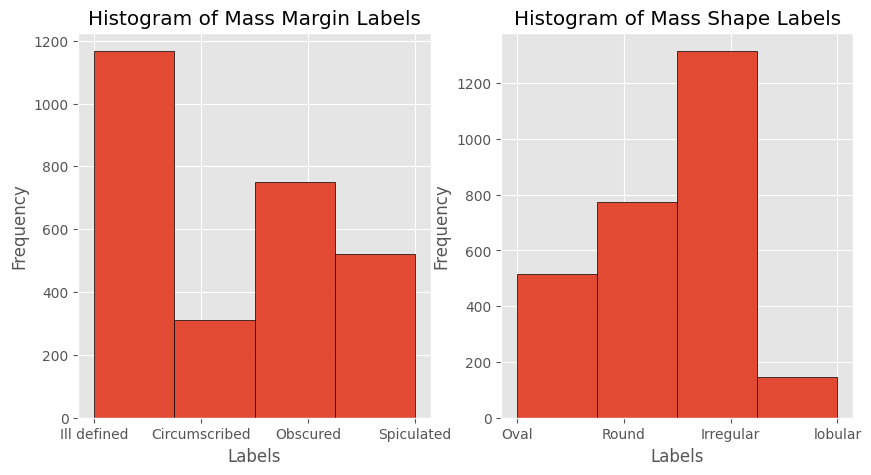

In [30]:
plt.style.use('ggplot')

# Plot histograms for mass_margin_labels
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(mass_margin_labels_flat, bins=len(set(mass_margin_labels_flat)), edgecolor='black')
plt.title('Histogram of Mass Margin Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')

# Plot histograms for mass_shape_labels
plt.subplot(1, 2, 2)
plt.hist(mass_shape_labels_flat, bins=len(set(mass_shape_labels_flat)), edgecolor='black')
plt.title('Histogram of Mass Shape Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')


There is an unbalance in terms of the labels found for the labelled regions. Ill defined class has the highest amount of image views, follewed by obsecured, spiculated, and circumscribed. In addition to that, we take into account that from the BI-RADS document, the margin of a lesion can be

```
1. Circumscribed (historically well-defined). This is a benign finding.
2. Obscured or partially obscured, when the margin is hidden by superimposed fibroglandular tissue.
3. Microlobulated. This implies a suspicious finding.
4. Indistinct (historically ill-defined). This is also a suspicious finding.
5/ Spiculated with radiating lines from the mass is a very suspicious finding.
```

Thus, we are missing `Microlobulated` class in this sample dataset.

As for the mass shape, we can see that the irrigular shape is dominant in most of the cases. Lobular shape, which could be assumed to be a part of oval shape, has the least cases. 

Given those labels, and knowing that an image view could contain different regions, with different types of mass margins and shapes, the image could be represented in multiple words / sentences (formed by multiple labels).

In [31]:
dataset[(dataset['has_mass'] == True) & (dataset['image_label'] != 2)]

,image_id,image_label,mass_margin,mass_shape,has_mass,image_path,has_mass_margin,has_mass_shape,has_multiple_margins,has_multiple_shapes,mass_margin_labels,mass_shape_labels
0,p0200000202cl,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Ill defined],[Oval]
1,p0200000202cr,0,"[-1, -1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
2,p0200000202ml,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Ill defined],[Oval]
3,p0200000202mr,0,"[-1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
5,p0200000301cr,0,[-1],[-1],True,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
6433,p0202054600mr,1,"[-1, -1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
6434,p0202057000cl,1,[Ill defined],[Irregular],True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Ill defined],[Irregular]
6436,p0202057000ml,1,[Ill defined],[Irregular],True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Ill defined],[Irregular]
6438,p0202061100cl,1,[Spiculated],[Irregular],True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Spiculated],[Irregular]


In [32]:
dataset[(dataset['has_mass'] == False) & (dataset['image_label'] != 2)]

,image_id,image_label,mass_margin,mass_shape,has_mass,image_path,has_mass_margin,has_mass_shape,has_multiple_margins,has_multiple_shapes,mass_margin_labels,mass_shape_labels
4,p0200000301cl,0,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
6,p0200000301ml,0,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
8,p0200000401cl,0,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
10,p0200000401ml,0,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
17,p0200000901cr,0,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
6417,p0202036800mr,1,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
6435,p0202057000cr,1,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
6437,p0202057000mr,1,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
6439,p0202061100cr,1,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]


In [37]:
dataset.head()

,image_id,image_label,mass_margin,mass_shape,has_mass,image_path,has_mass_margin,has_mass_shape,has_multiple_margins,has_multiple_shapes,mass_margin_labels,mass_shape_labels
0,p0200000202cl,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Ill defined],[Oval]
1,p0200000202cr,0,"[-1, -1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
2,p0200000202ml,0,"[Ill defined, -1, -1, -1, -1, -1, -1]","[Oval, -1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,True,True,False,False,[Ill defined],[Oval]
3,p0200000202mr,0,"[-1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1]",True,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]
4,p0200000301cl,0,[-1],[-1],False,/storage/Features/features/png_archive/2D_100m...,False,False,False,False,[],[]


In [58]:
combined_mass_margins = [(' / ').join(set(sublist)) for sublist in dataset['mass_margin_labels'] if len(sublist) > 0]
combined_mass_shapes = [(' / ').join(set(sublist)) for sublist in dataset['mass_shape_labels'] if len(sublist) > 0]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Oval'),
  Text(1, 0, 'Oval / Round'),
  Text(2, 0, 'Round'),
  Text(3, 0, 'Irregular'),
  Text(4, 0, 'lobular'),
  Text(5, 0, 'Irregular / Round'),
  Text(6, 0, 'lobular / Oval'),
  Text(7, 0, 'Oval / Irregular'),
  Text(8, 0, 'Oval / Irregular / Round'),
  Text(9, 0, 'lobular / Irregular')])

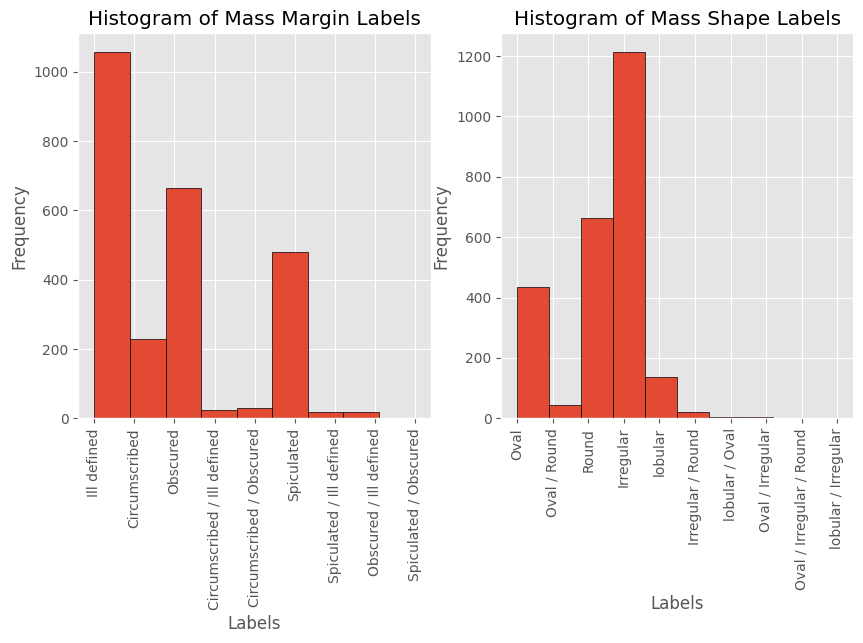

In [59]:
plt.style.use('ggplot')

# Plot histograms for mass_margin_labels
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(combined_mass_margins, bins=len(set(combined_mass_margins)), edgecolor='black')
plt.title('Histogram of Mass Margin Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Plot histograms for mass_shape_labels
plt.subplot(1, 2, 2)
plt.hist(combined_mass_shapes, bins=len(set(combined_mass_shapes)), edgecolor='black')
plt.title('Histogram of Mass Shape Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

